In [1]:
import numpy as np
import pandas as pd
df=pd.read_excel('国泰安企业数据.xlsx',usecols=[i for i in range(1,26)])
df

C:\Users\liu'bo'yan\AppData\Local\Temp\ipykernel_5584\3928779777.py:2: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df=pd.read_excel('国泰安企业数据.xlsx',usecols=[i for i in range(1,26)])


,证券代码,截止日期,专利申请,专利授权,发明专利申请,发明专利授权,ROA,资产负债率,营业总收入,无形资产净额,...,行业代码,行业名称,员工人数,固定资产净额,长期待摊费用,递延所得税资产,负债合计,知识产权保护指数,股权性质,股权性质编码
0,333,2017,18454,9212,9029,29,0.115917,0.629486,2.416680e+11,2.311540e+08,...,C76,电器机械及器材制造业,101826.0,2.260072e+10,8.591060e+08,4.023334e+09,1.651817e+11,3.440215,民营,2
1,1979,2017,9,5,4,0,0.032924,0.717201,8.882661e+08,1.896953e+07,...,J,房地产业,23242.0,NaN,NaN,NaN,NaN,3.440215,国企,1
2,2209,2017,79,39,40,0,0.003962,0.602065,9.616277e+08,2.094895e+07,...,C73,专用设备制造业,1500.0,3.879381e+08,3.820354e+07,3.036693e+07,1.023075e+09,3.440215,民营,2
3,2212,2017,92,6,86,0,-0.001089,0.087459,5.133109e+09,7.474680e+06,...,C76,电器机械及器材制造业,3736.0,6.714098e+08,1.051467e+06,5.807732e+07,1.590295e+09,3.440215,民营,2
4,2213,2017,6,1,5,0,-0.045961,0.233421,1.182946e+08,1.192892e+07,...,C75,交通运输设备制造业,200.0,7.580875e+07,1.519736e+06,8.509880e+05,6.735123e+07,3.440215,其他,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,300026,2009,2,2,2,2,0.076259,0.127024,2.250805e+08,2.138427e+07,...,C81,医药制造业,563.0,1.011386e+08,4.480000e+05,2.674295e+06,1.348987e+08,2.691873,民营,2
7531,300086,2010,2,1,2,1,0.060739,0.022137,2.123890e+08,2.502715e+07,...,C81,医药制造业,680.0,1.063409e+08,5.391394e+05,1.315669e+05,7.601259e+07,2.956855,民营,2
7532,300086,2011,8,7,6,5,-0.001383,0.017114,3.042419e+08,2.429532e+07,...,C81,医药制造业,740.0,2.595644e+08,1.937458e+06,2.041752e+06,1.107742e+08,3.121104,民营,2
7533,601118,2011,1,1,1,1,0.068582,0.173354,4.746734e+09,3.935372e+08,...,A01,农业,75082.0,NaN,NaN,NaN,NaN,3.121104,国企,1


In [3]:
if '公司成立日期' not in df.columns:
    df_company_create_date=pd.read_excel("国泰安数据/xlsx/公司成立日期.xlsx")
    df=pd.merge(df,df_company_create_date,on='证券代码')
    df['公司成立日期']=pd.to_datetime(df['公司成立日期'])
group=df.groupby('证券代码')
for g in group:
    # print(len(g[-1]))
    if 2017 not in g[-1].loc[:,'截止日期']:
        # print(g)
        df.drop(group.get_group(g[0]).index)
# df.set_index("证券代码")
df

,证券代码,截止日期,专利申请,专利授权,发明专利申请,发明专利授权,ROA,资产负债率,营业总收入,无形资产净额,...,行业名称,员工人数,固定资产净额,长期待摊费用,递延所得税资产,负债合计,知识产权保护指数,股权性质,股权性质编码,公司成立日期
0,333,2017,18454,9212,9029,29,0.115917,0.629486,2.416680e+11,2.311540e+08,...,电器机械及器材制造业,101826.0,2.260072e+10,8.591060e+08,4.023334e+09,1.651817e+11,3.440215,民营,2,2000-04-07
1,333,2013,5621,5172,1684,1235,0.126968,0.616151,1.210601e+11,1.771967e+08,...,电器机械及器材制造业,109085.0,1.957216e+10,6.478823e+08,2.567204e+09,5.786546e+10,2.648622,民营,2,2000-04-07
2,333,2014,8229,7116,2738,1625,0.112997,0.671262,1.419048e+11,2.806564e+08,...,电器机械及器材制造业,108120.0,1.952181e+10,7.585761e+08,3.779988e+09,7.456063e+10,3.260641,民营,2,2000-04-07
3,333,2015,17656,13725,7140,3209,0.094976,0.676290,8.623760e+08,2.484820e+08,...,电器机械及器材制造业,93299.0,1.872988e+10,7.813590e+08,2.223999e+09,7.281031e+10,3.298363,民营,2,2000-04-07
4,333,2016,20107,11844,8911,648,0.115317,0.661873,1.593993e+11,2.360830e+08,...,电器机械及器材制造业,96418.0,2.105679e+10,6.259710e+08,3.030383e+09,1.016240e+11,3.258239,民营,2,2000-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522,2646,2013,9,9,1,1,0.108053,0.147950,1.437727e+09,4.218516e+07,...,饮料制造业,1736.0,NaN,NaN,NaN,NaN,3.098579,民营,2,2005-01-27
7523,2646,2014,22,21,1,0,0.131822,0.108737,1.355142e+09,1.434327e+08,...,饮料制造业,1841.0,NaN,NaN,NaN,NaN,2.240817,民营,2,2005-01-27
7524,2646,2016,9,8,1,0,0.106578,0.146566,1.437205e+09,1.428369e+08,...,饮料制造业,2198.0,NaN,NaN,NaN,NaN,2.662997,民营,2,2005-01-27
7525,2646,2011,6,6,0,0,0.117757,0.113804,6.184248e+08,3.100840e+07,...,饮料制造业,1446.0,NaN,NaN,NaN,NaN,1.706202,民营,2,2005-01-27


In [4]:
from math import log
df['专利产出']=df['专利授权']/df['资产总计']
df['Age']=(df['截止日期']-df['公司成立日期'].map(lambda x:x.year)).map(lambda x:log(x) if x>0 else 0)
df['公司规模']=df['资产总计'].map(lambda x:log(x))
# df['Q']=(df['股票市值'])
print(type(df['截止日期'][0]))

<class 'numpy.int64'>


In [5]:
shiZhi=pd.read_excel('国泰安数据/xlsx/市值.xlsx')
shiZhi['证券代码']=shiZhi['证券代码'].map(lambda x:int(x[:-3].lstrip("0")))
shiZhi.columns=['证券代码', 2013, 2011, 2012, 2014, 2015, 2016, 2018, 2010, 2009, 2017]
shiZhi
# print(type(shiZhi['证券代码'][0]))

,证券代码,2013,2011,2012,2014,2015,2016,2018,2010,2009,2017
0,1,1.004177e+11,7.987303e+10,8.207607e+10,1.809703e+11,1.715610e+11,1.562507e+11,1.610585e+11,5.502837e+10,7.567942e+10,2.283665e+11
1,2,8.845020e+10,8.213422e+10,1.112750e+11,1.534214e+11,2.699909e+11,2.268546e+11,2.629526e+11,9.038063e+10,1.188582e+11,3.428761e+11
2,4,9.783284e+08,6.793714e+08,6.869293e+08,1.307517e+09,3.854530e+09,3.770553e+09,1.346146e+09,1.011079e+09,8.397668e+08,1.879398e+09
3,5,2.285834e+09,3.529328e+09,2.715571e+09,3.748768e+09,1.062771e+10,7.155709e+09,2.836879e+09,3.355604e+09,5.504288e+09,4.382343e+09
4,6,6.655476e+09,4.054930e+09,6.364262e+09,9.517465e+09,1.553844e+10,1.275745e+10,6.992974e+09,5.302601e+09,5.746386e+09,1.329745e+10
...,...,...,...,...,...,...,...,...,...,...,...
4117,688699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4118,688777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4119,688788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4120,688981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import traceback
q_arr=[]
shi_zhi=[]
for i in df.itertuples():
    # print(i)
    # print(shiZhi[shiZhi['证券代码']==i[1]])
    # break
    try:
        if not shiZhi[shiZhi['证券代码']==i[1]].empty:
            q_arr.append(((shiZhi[shiZhi['证券代码']==i[1]][i[2]]+i[20])/(i[11]-i[18]-i[10]-i[19])).values[0])
            shi_zhi.append(shiZhi[shiZhi['证券代码']==i[1]][i[2]].values[0])
        else:
            q_arr.append(0)
            shi_zhi.append(0)
    except Exception as e:
        print(i)
        # print(i[1])
        # print(i[2])
        print(shiZhi[shiZhi['证券代码']==i[1]])
        print(shiZhi[shiZhi['证券代码']==i[1]].columns)
        traceback.print_exc()
        break
# len(q_arr)
df['Q']=q_arr

df['国有企业']=pd.get_dummies(df['股权性质'])['国企']
# df.drop('市值')
# df.insert(23,'市值',shi_zhi)
# d = df.pop('市值')
df.insert(23,'市值',shi_zhi)
print(df.columns)
df

Index(['证券代码', '截止日期', '专利申请', '专利授权', '发明专利申请', '发明专利授权', 'ROA', '资产负债率',
       '营业总收入', '无形资产净额', '资产总计', '无形资产率', '地区', '行业代码', '行业名称', '员工人数',
       '固定资产净额', '长期待摊费用', '递延所得税资产', '负债合计', '知识产权保护指数', '股权性质', '股权性质编码',
       '市值', '公司成立日期', '专利产出', 'Age', '公司规模', 'Q', '国有企业'],
      dtype='object')


,证券代码,截止日期,专利申请,专利授权,发明专利申请,发明专利授权,ROA,资产负债率,营业总收入,无形资产净额,...,知识产权保护指数,股权性质,股权性质编码,市值,公司成立日期,专利产出,Age,公司规模,Q,国有企业
0,333,2017,18454,9212,9029,29,0.115917,0.629486,2.416680e+11,2.311540e+08,...,3.440215,民营,2,3.629848e+11,2000-04-07,9.907803e-08,2.833213,25.255620,6.011207,0
1,333,2013,5621,5172,1684,1235,0.126968,0.616151,1.210601e+11,1.771967e+08,...,2.648622,民营,2,8.431617e+10,2000-04-07,1.305254e-07,2.564949,24.402712,3.924181,0
2,333,2014,8229,7116,2738,1625,0.112997,0.671262,1.419048e+11,2.806564e+08,...,3.260641,民营,2,1.156818e+11,2000-04-07,1.296398e-07,2.639057,24.728607,3.799429,0
3,333,2015,17656,13725,7140,3209,0.094976,0.676290,8.623760e+08,2.484820e+08,...,3.298363,民营,2,1.400377e+11,2000-04-07,1.984894e-07,2.708050,24.959505,3.230185,0
4,333,2016,20107,11844,8911,648,0.115317,0.661873,1.593993e+11,2.360830e+08,...,3.258239,民营,2,1.817183e+11,2000-04-07,1.425772e-07,2.772589,25.142959,3.578534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522,2646,2013,9,9,1,1,0.108053,0.147950,1.437727e+09,4.218516e+07,...,3.098579,民营,2,9.000000e+09,2005-01-27,4.615029e-09,2.079442,21.391172,NaN,0
7523,2646,2014,22,21,1,0,0.131822,0.108737,1.355142e+09,1.434327e+08,...,2.240817,民营,2,9.652500e+09,2005-01-27,1.044674e-08,2.197225,21.421498,NaN,0
7524,2646,2016,9,8,1,0,0.106578,0.146566,1.437205e+09,1.428369e+08,...,2.662997,民营,2,8.662500e+09,2005-01-27,3.179816e-09,2.397895,21.645884,NaN,0
7525,2646,2011,6,6,0,0,0.117757,0.113804,6.184248e+08,3.100840e+07,...,1.706202,民营,2,8.001000e+09,2005-01-27,3.338545e-09,1.791759,21.309490,NaN,0


In [11]:
df[['证券代码','截止日期','专利申请','专利授权','发明专利申请','发明专利授权','专利产出','ROA','资产负债率','无形资产率','地区', '行业代码', '知识产权保护指数','市值','Age','公司规模', 'Q', '国有企业']].describe()

,证券代码,截止日期,专利申请,专利授权,发明专利申请,发明专利授权,专利产出,ROA,资产负债率,无形资产率,知识产权保护指数,市值,Age,公司规模,Q,国有企业
count,7527.000000,7527.000000,7527.000000,7527.000000,7527.000000,7527.000000,7.527000e+03,7527.000000,7527.000000,7527.000000,7527.000000,7.527000e+03,7527.000000,7527.000000,6621.000000,7527.000000
mean,218194.480537,2014.313936,64.751827,46.563040,26.210575,8.149462,1.360908e-08,0.048473,0.270863,0.025279,3.110346,1.113373e+10,2.401210,21.457030,4.037032,0.116912
std,219028.658859,2.260158,431.930055,287.574101,190.622688,54.881092,2.182709e-08,0.053596,0.169967,0.030997,0.532110,3.820119e+10,0.516862,1.059269,2.612196,0.321337
min,333.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.312429,0.001293,0.000000,0.776838,0.000000e+00,0.000000,19.395725,0.000000,0.000000
25%,2493.000000,2013.000000,7.000000,4.000000,2.000000,0.000000,2.359480e-09,0.020577,0.135286,0.006654,2.922814,3.084103e+09,2.197225,20.745982,2.315250,0.000000
50%,300056.000000,2015.000000,18.000000,12.000000,6.000000,1.000000,6.821133e-09,0.045303,0.239587,0.017279,3.298363,5.292234e+09,2.484907,21.285503,3.334057,0.000000
75%,300369.000000,2016.000000,45.000000,31.000000,17.000000,5.000000,1.592663e-08,0.072272,0.381698,0.033921,3.456940,9.285054e+09,2.772589,21.913551,4.945083,0.000000
max,603999.000000,2017.000000,20107.000000,13725.000000,9029.000000,3209.000000,4.062991e-07,0.349506,1.085344,0.608744,3.754392,1.243961e+12,3.610918,30.671408,27.588932,1.000000


In [12]:
zhuan_li=pd.read_excel("国泰安数据/xlsx/专利.xlsx",usecols=[0,4,5,9,10],skiprows=[0])

In [13]:
zhuan_li.columns=['证券代码','专利申请','专利申请(授权个数)','发明申请','发明申请(授权个数)']
zhuan_li_group=zhuan_li.groupby('证券代码').sum()
# for g in group:
# print(g)
d={}
for i in zhuan_li_group.itertuples():
    if not df[df['证券代码']==i[0]].empty:
        # print(type(i[0]))
        # print(i[0])
        # print(df[df['证券代码']==i[0]])
        # print(df[df['证券代码']==i[0]]['地区'].values[0])
        # break
        if df[df['证券代码']==i[0]]['地区'].values[0] not in d:
            d[df[df['证券代码']==i[0]]['地区'].values[0]]={"专利申请":i[1],"专利授权":i[2],"发明专利申请":i[3],"发明专利申请授权":i[4]}
        else:
            d[df[df['证券代码']==i[0]]['地区'].values[0]]["专利申请"]+=i[1]
            d[df[df['证券代码']==i[0]]['地区'].values[0]]["专利授权"]+=i[2]
            d[df[df['证券代码']==i[0]]['地区'].values[0]]["发明专利申请"]+=i[3]
            d[df[df['证券代码']==i[0]]['地区'].values[0]]["发明专利申请授权"]+=i[4]
    else:
        continue
d

{'广东': {'专利申请': 485661, '专利授权': 337764, '发明专利申请': 200778, '发明专利申请授权': 54153},
 '天津': {'专利申请': 11130, '专利授权': 6099, '发明专利申请': 6414, '发明专利申请授权': 1422},
 '浙江': {'专利申请': 126336, '专利授权': 100929, '发明专利申请': 37374, '发明专利申请授权': 12327},
 '辽宁': {'专利申请': 10416, '专利授权': 7320, '发明专利申请': 5121, '发明专利申请授权': 2028},
 '新疆': {'专利申请': 2409, '专利授权': 1695, '发明专利申请': 984, '发明专利申请授权': 270},
 '上海': {'专利申请': 57885, '专利授权': 39678, '发明专利申请': 25164, '发明专利申请授权': 7092},
 '河南': {'专利申请': 29691, '专利授权': 23439, '发明专利申请': 9372, '发明专利申请授权': 3162},
 '福建': {'专利申请': 32448, '专利授权': 22281, '发明专利申请': 15339, '发明专利申请授权': 5241},
 '江苏': {'专利申请': 91236, '专利授权': 63330, '发明专利申请': 37635, '发明专利申请授权': 9843},
 '安徽': {'专利申请': 30024, '专利授权': 19737, '发明专利申请': 13491, '发明专利申请授权': 3225},
 '吉林': {'专利申请': 1383, '专利授权': 981, '发明专利申请': 732, '发明专利申请授权': 330},
 '山东': {'专利申请': 81888, '专利授权': 62685, '发明专利申请': 28338, '发明专利申请授权': 9186},
 '四川': {'专利申请': 26313, '专利授权': 19845, '发明专利申请': 10125, '发明专利申请授权': 3681},
 '湖南': {'专利申请': 19554, '专利授权': 15186, '发明专利申请':

In [14]:
# for k,v in d.items():
#     print(v['专利申请'])
new_d=dict(sorted(d.items(),key=lambda d:d[1]['专利申请'],reverse=True)[:10])
new_d

{'广东': {'专利申请': 485661, '专利授权': 337764, '发明专利申请': 200778, '发明专利申请授权': 54153},
 '北京': {'专利申请': 356469, '专利授权': 255816, '发明专利申请': 157590, '发明专利申请授权': 57420},
 '浙江': {'专利申请': 126336, '专利授权': 100929, '发明专利申请': 37374, '发明专利申请授权': 12327},
 '江苏': {'专利申请': 91236, '专利授权': 63330, '发明专利申请': 37635, '发明专利申请授权': 9843},
 '山东': {'专利申请': 81888, '专利授权': 62685, '发明专利申请': 28338, '发明专利申请授权': 9186},
 '上海': {'专利申请': 57885, '专利授权': 39678, '发明专利申请': 25164, '发明专利申请授权': 7092},
 '福建': {'专利申请': 32448, '专利授权': 22281, '发明专利申请': 15339, '发明专利申请授权': 5241},
 '安徽': {'专利申请': 30024, '专利授权': 19737, '发明专利申请': 13491, '发明专利申请授权': 3225},
 '河南': {'专利申请': 29691, '专利授权': 23439, '发明专利申请': 9372, '发明专利申请授权': 3162},
 '四川': {'专利申请': 26313, '专利授权': 19845, '发明专利申请': 10125, '发明专利申请授权': 3681}}

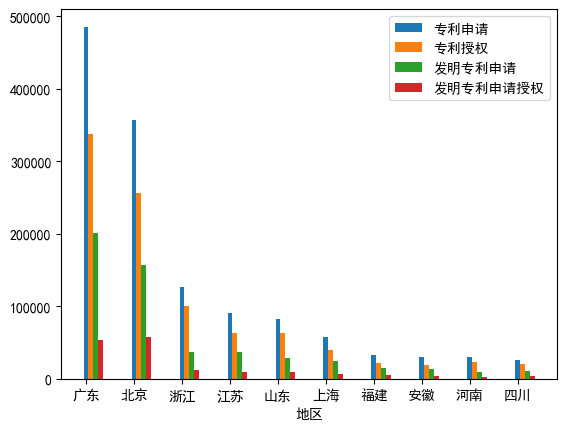

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
zhuan_li_shen_qing=[]
zhuan_li_shou_quan=[]
fa_ming_zhuan_li_shen_qing=[]
fa_ming_zhuan_li_shen_qing_shou_quan=[]
for i in new_d:
    v=new_d[i]
    zhuan_li_shen_qing.append(list(v.values())[0])
    zhuan_li_shou_quan.append(list(v.values())[1])
    fa_ming_zhuan_li_shen_qing.append(list(v.values())[2])
    fa_ming_zhuan_li_shen_qing_shou_quan.append(list(v.values())[3])
index=np.arange(0,20,2)
plt.bar(index,zhuan_li_shen_qing,width=0.2,label='专利申请',tick_label=list(new_d.keys()))
plt.bar(index+0.2,zhuan_li_shou_quan,width=0.2,label='专利授权')
plt.bar(index+0.4,fa_ming_zhuan_li_shen_qing,width=0.2,label='发明专利申请')
plt.bar(index+0.6,fa_ming_zhuan_li_shen_qing_shou_quan,width=0.2,label='发明专利申请授权')
plt.xlabel("地区")
plt.legend()
# plt.show()

C:\Users\liu'bo'yan\AppData\Local\Temp\ipykernel_5584\4228264066.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df[variables].corr()


D:\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


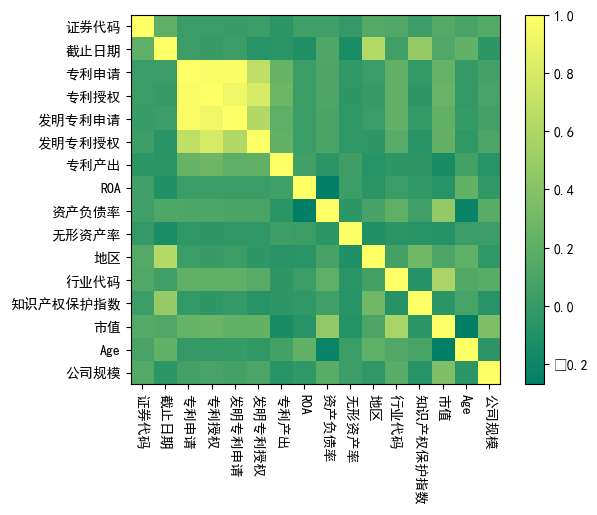

In [83]:
variables=['证券代码','截止日期','专利申请','专利授权','发明专利申请','发明专利授权','专利产出','ROA','资产负债率','无形资产率','地区', '行业代码', '知识产权保护指数','市值','Age','公司规模', 'Q', '国有企业']
plt.xticks(np.arange(len(variables)),labels=variables,rotation=270)
plt.yticks(np.arange(len(variables)),labels=variables)
corr=df[variables].corr()
# type(corr)
# len(arr)
# for i in arr:
#     for j in arr:
#         text = plt.text(j, i, corr.at[i,j], ha="center", va="center", color="w")
plt.imshow(corr,cmap=plt.cm.summer)
plt.colorbar()

In [64]:
from scipy import stats
for s in variables:
    print(s)
    print(stats.kstest(df[s],stats.norm.cdf))
    print(stats.shapiro(df[s]))

证券代码
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.7795878052711487, pvalue=0.0)
截止日期
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9112588167190552, pvalue=0.0)
专利申请
KstestResult(statistic=0.9339391200778604, pvalue=0.0)
ShapiroResult(statistic=0.07740670442581177, pvalue=0.0)
专利授权
KstestResult(statistic=0.8684415778963803, pvalue=0.0)
ShapiroResult(statistic=0.09123748540878296, pvalue=0.0)
发明专利申请
KstestResult(statistic=0.7855400234922353, pvalue=0.0)
ShapiroResult(statistic=0.07098841667175293, pvalue=0.0)
发明专利授权
KstestResult(statistic=0.5, pvalue=0.0)
ShapiroResult(statistic=0.09425216913223267, pvalue=0.0)
专利产出
KstestResult(statistic=0.5, pvalue=0.0)
ShapiroResult(statistic=0.5576182007789612, pvalue=0.0)
ROA
KstestResult(statistic=0.4676228766941631, pvalue=0.0)
ShapiroResult(statistic=0.7794402837753296, pvalue=0.0)
资产负债率
KstestResult(statistic=0.500529388826185, pvalue=0.0)
ShapiroResult(statistic=0.9514520168304443, pvalue=2.382207389352

D:\python\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [66]:
import statsmodels.formula.api as smf
regression1=smf.ols(formula='专利产出~知识产权保护指数',data=df)
model1=regression1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   专利产出   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.70
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.67e-10
Time:                        19:08:38   Log-Likelihood:             1.2212e+05
No. Observations:                7527   AIC:                        -2.442e+05
Df Residuals:                    7525   BIC:                        -2.442e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.262e-08   1.49e-09     15.195      0.0

In [67]:
regression2=smf.ols(formula='专利产出~国有企业',data=df)
model2=regression2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   专利产出   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     29.91
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.67e-08
Time:                        19:08:45   Log-Likelihood:             1.2211e+05
No. Observations:                7527   AIC:                        -2.442e+05
Df Residuals:                    7525   BIC:                        -2.442e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.411e-08   2.67e-10     52.800      0.0

In [68]:
regression3=smf.ols(formula='专利产出~ROA+资产负债率+无形资产率+知识产权保护指数+市值+Age+公司规模+Q',data=df)
model3=regression3.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   专利产出   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     27.24
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           5.50e-42
Time:                        19:10:47   Log-Likelihood:             1.0772e+05
No. Observations:                6621   AIC:                        -2.154e+05
Df Residuals:                    6612   BIC:                        -2.154e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.113e-07   9.08e-09     12.263      0.0

In [69]:
regression4=smf.ols(formula='专利产出~ROA+资产负债率+无形资产率+知识产权保护指数+市值+Age+公司规模+Q',data=df.groupby('国有企业').get_group(0))
model4=regression4.fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                   专利产出   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     30.38
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           5.11e-47
Time:                        19:11:52   Log-Likelihood:                 97411.
No. Observations:                5992   AIC:                        -1.948e+05
Df Residuals:                    5983   BIC:                        -1.947e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.466e-07   1.11e-08     13.260      0.0

In [70]:
regression5=smf.ols(formula='专利产出~ROA+资产负债率+无形资产率+知识产权保护指数+市值+Age+公司规模+Q',data=df.groupby('国有企业').get_group(1))
model5=regression5.fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                   专利产出   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     6.750
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.66e-08
Time:                        19:12:12   Log-Likelihood:                 10370.
No. Observations:                 629   AIC:                        -2.072e+04
Df Residuals:                     620   BIC:                        -2.068e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.839e-08   1.89e-08      3.616      0.0

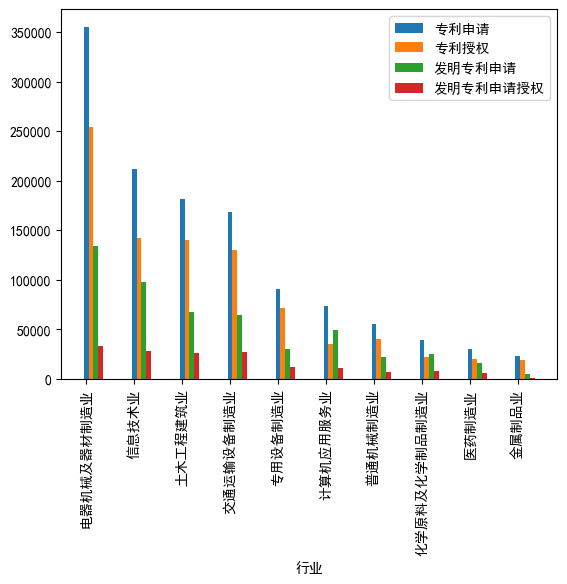

In [82]:
d_hang_ye = {}
for i in zhuan_li_group.itertuples():
    if not df[df['证券代码'] == i[0]].empty:
        # print(type(i[0]))
        # print(i[0])
        # print(df[df['证券代码']==i[0]])
        # print(df[df['证券代码']==i[0]]['地区'].values[0])
        # break
        if df[df['证券代码'] == i[0]]['行业名称'].values[0] not in d_hang_ye:
            d_hang_ye[df[df['证券代码'] == i[0]]['行业名称'].values[0]] = {"专利申请": i[1], "专利授权": i[2], "发明专利申请": i[3],
                                                               "发明专利申请授权": i[4]}
        else:
            d_hang_ye[df[df['证券代码'] == i[0]]['行业名称'].values[0]]["专利申请"] += i[1]
            d_hang_ye[df[df['证券代码'] == i[0]]['行业名称'].values[0]]["专利授权"] += i[2]
            d_hang_ye[df[df['证券代码'] == i[0]]['行业名称'].values[0]]["发明专利申请"] += i[3]
            d_hang_ye[df[df['证券代码'] == i[0]]['行业名称'].values[0]]["发明专利申请授权"] += i[4]
    else:
        continue
new_d_hang_ye = dict(sorted(d_hang_ye.items(), key=lambda d: d[1]['专利申请'], reverse=True)[:10])
# new_d_hang_ye
zhuan_li_shen_qing = []
zhuan_li_shou_quan = []
fa_ming_zhuan_li_shen_qing = []
fa_ming_zhuan_li_shen_qing_shou_quan = []
for i in new_d_hang_ye:
    v = new_d_hang_ye[i]
    zhuan_li_shen_qing.append(list(v.values())[0])
    zhuan_li_shou_quan.append(list(v.values())[1])
    fa_ming_zhuan_li_shen_qing.append(list(v.values())[2])
    fa_ming_zhuan_li_shen_qing_shou_quan.append(list(v.values())[3])
index = np.arange(0, 20, 2)
plt.bar(index, zhuan_li_shen_qing, width=0.2, label='专利申请', tick_label=list(new_d_hang_ye.keys()))
plt.bar(index + 0.2, zhuan_li_shou_quan, width=0.2, label='专利授权')
plt.bar(index + 0.4, fa_ming_zhuan_li_shen_qing, width=0.2, label='发明专利申请')
plt.bar(index + 0.6, fa_ming_zhuan_li_shen_qing_shou_quan, width=0.2, label='发明专利申请授权')
plt.xlabel("行业")
plt.xticks(rotation=90)
plt.legend()